## Ⅰ. Загрузка данных

In [1]:
# Загружаем необходимые библиотеки

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [2]:
#Загружаем данные

users = pd.read_csv("/datasets/users_go.csv")
riders = pd.read_csv("/datasets/rides_go.csv")
subs = pd.read_csv("/datasets/subscriptions_go.csv")

##### Изучим общую информацию о каждом датафрейме

In [3]:
# Выводим основную информацию

def data_info(name_dataset):
    print(name_dataset.info())
    display(name_dataset.head())

nm = ['USERS', 'RIDERS', 'SUBS']
i=0
for ds in [users, riders, subs]:
    print('++++++++++++++++++++ < {0} > +++++++++++++++++++++'.format(nm[i]))
    i+=1
    print()
    data_info(ds)
    print()

++++++++++++++++++++ < USERS > +++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



++++++++++++++++++++ < RIDERS > +++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



++++++++++++++++++++ < SUBS > +++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод:**

Загрузили данные о пользователях в переменную 'users', о поездках в переменную  'riders', о подписках в переменную 'subs'.  
В данных о пользователях 1565 записей, 5 колонок.  
В данных о поездках 18068 записей, 4 колонки.  
В данных о подписке 2 записи, 4 колонки.  
Все записи соответствуют своим типам, кроме 'riders', где параметр 'date' требует изменения на 'datetime'.   
Пропусков в данных н обнаружено. 

## Ⅱ. Предобработка данных

##### Приведем столбец date к типу даты pandas

In [4]:
# Преобразуем столбец date в riders в формат datetime

riders['date'] = pd.to_datetime(riders['date'], format='%Y-%m-%d')
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [5]:
riders['date'].dt.year.unique()

array([2021])

In [6]:
riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Все предоставленные данные за период 2021 года

##### Создадим новый столбец с номером месяца на основе столбца date

In [7]:
# Добавим в riders столбец с номером месяца 

riders['month'] = riders['date'].dt.month

In [8]:
riders.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Проверим наличие дубликатов в датафреймах

In [9]:
# Поиск дубликатов в users и riders

print("Количество дубликатов в 'users':", users.duplicated().sum())
print("Количество дубликатов в 'riders':", riders.duplicated().sum())

Количество дубликатов в 'users': 31
Количество дубликатов в 'riders': 0


In [10]:
# Удаление дуюликатов users

users = users.drop_duplicates().reset_index(drop=True)
riders.duplicated().sum()

0

**Вывод по разделу "Предобработка данных"**

В ходе предобработки был изменён тип данных на 'datetime' в столбце 'date' в таблице о поездках. Дубликатов в данной таблице не обнаружено.  
Обнаружены дубликаты в записях о пользователях в количестве 31 штуки. Дубликаты удалены.  
Все предоставленные нам данные оказались за период 2021 года.  
В таблицу 'riders' добавлен столбец с порядковым номера месяца, в котором совершалась поездка.

## Ⅲ. Исследовательский анализ данных

##### Частота встречаемости городов

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


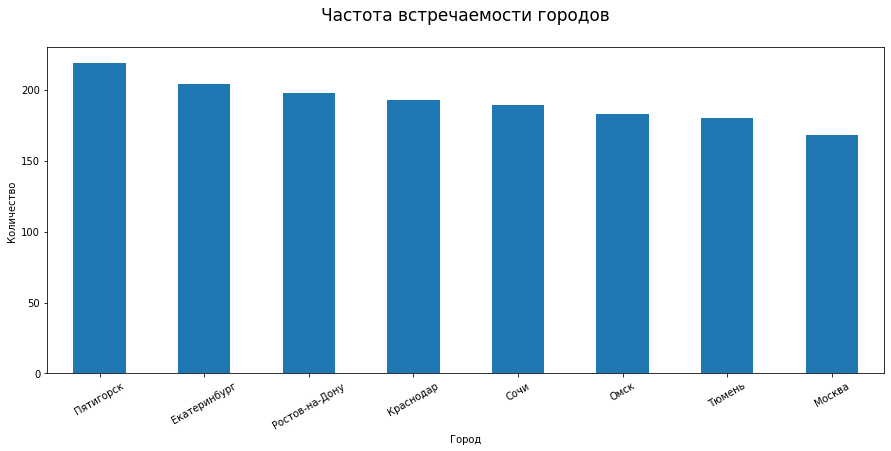

In [11]:
print(users['city'].value_counts())
users['city'].value_counts().plot.bar(figsize = (15,6), rot=30)
plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Частота встречаемости городов' + "\n", fontsize=17);

Вывод: сервис аренды самокатов имеет наибольшую популярность в Пятигорске, в Москве имеет наименьшую популярность.

##### Cоотношение пользователей с подпиской и без подписки

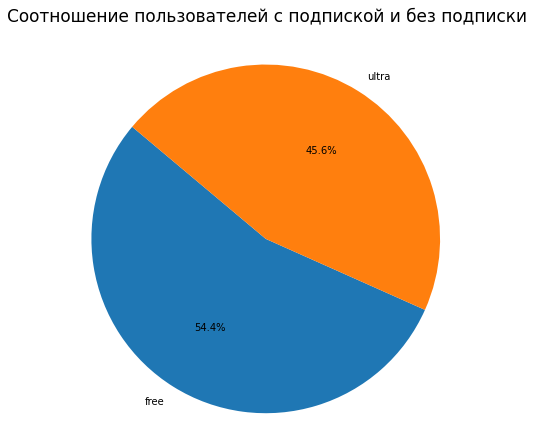

In [12]:
# Создаем счетчик значений 'subscription_type'
subscription_counts = users['subscription_type'].value_counts()

# Рисуем круговую диаграмму
plt.figure(figsize=(7, 7))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Соотношение пользователей с подпиской и без подписки' + "\n", fontsize=17)
plt.show();

Пользователей без подписки - 54,4%  
Пользователей с подпиской - 45,6%

##### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


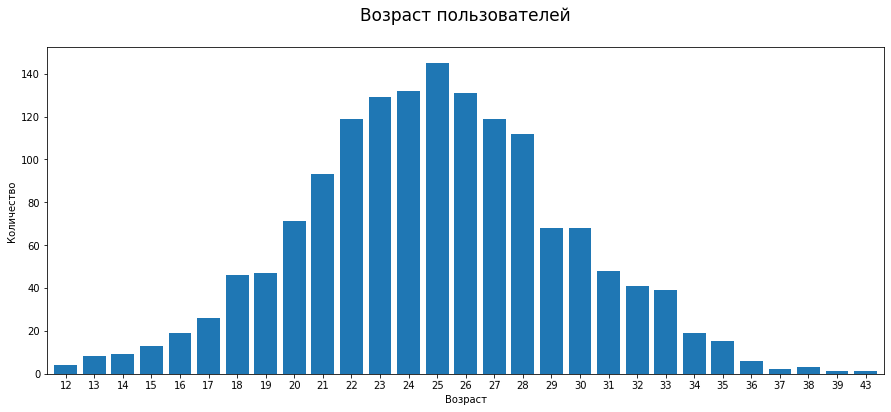

In [13]:
print(users['age'].describe())
users['age'].value_counts().sort_index().plot.bar(figsize = (15,6), rot=1, width=0.8)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Возраст пользователей' + "\n", fontsize=17);

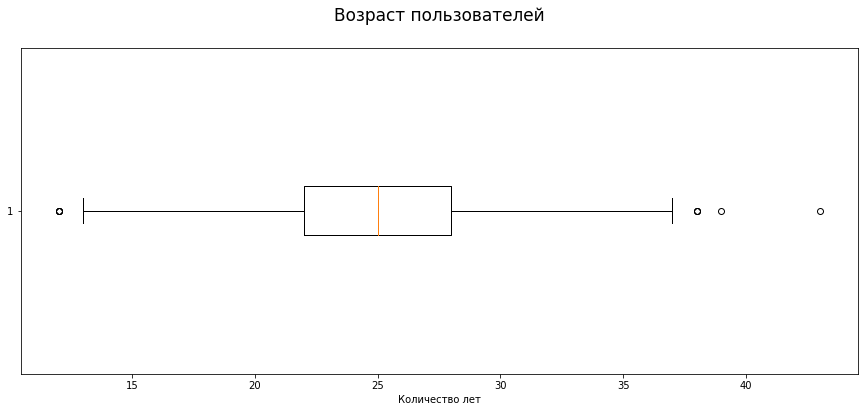

In [14]:
plt.figure(figsize=(15, 6))
plt.boxplot(users['age'], vert=False)
plt.xlabel('Количество лет')
plt.title('Возраст пользователей' + "\n", fontsize=17);
plt.show()

Исходя из этих данных, можно сказать, что основная часть пользователей имеет возраст от 22 до 28 лет, средний возраст близок к 25 годам. Максимальный возраст пользователей сервиса - 43 года, минимальный - 12 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


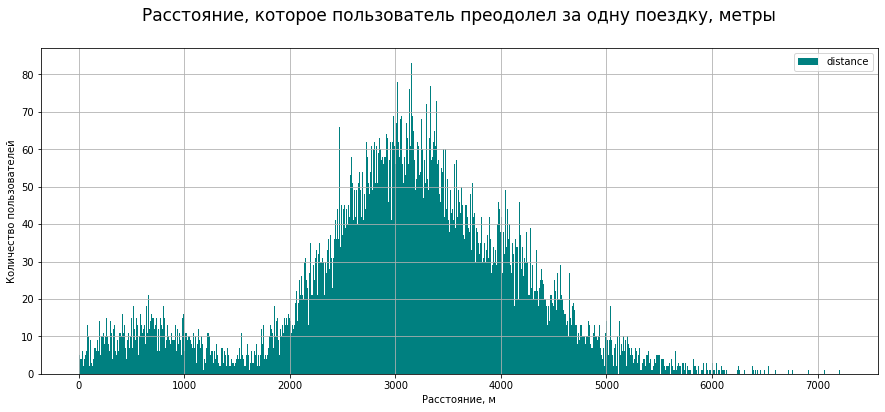

In [15]:
print(riders['distance'].describe())
riders['distance'].plot.hist(bins=1000, grid=True, legend=True, figsize = (15,6), color='Teal');
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.title('Расстояние, которое пользователь преодолел за одну поездку, метры' + "\n", fontsize=17);

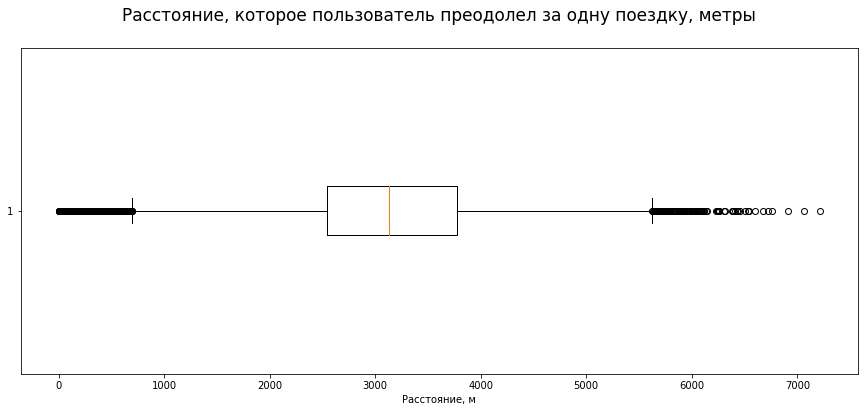

In [16]:
plt.figure(figsize=(15, 6))
plt.boxplot(riders['distance'], vert=False)
plt.xlabel('Расстояние, м')
plt.title('Расстояние, которое пользователь преодолел за одну поездку, метры' + "\n", fontsize=17);
plt.show()

Вывод: на гистограмме видим большой объём значений в области 3000 м и поменьше в области 700 м. Без учёта меньшей части гистограммы рспределение напоминает нормальное.

#####  Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


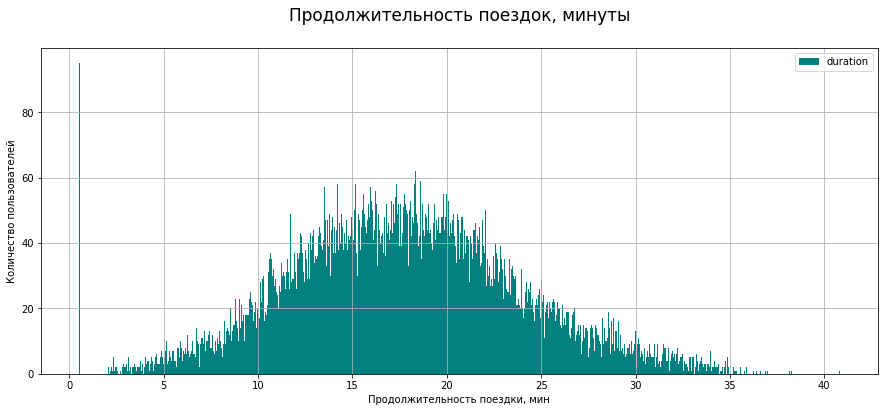

In [17]:
print(riders['duration'].describe())
riders['duration'].plot.hist(bins=1000, grid=True, legend=True, figsize = (15,6), color='Teal');
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок, минуты' + "\n", fontsize=17);

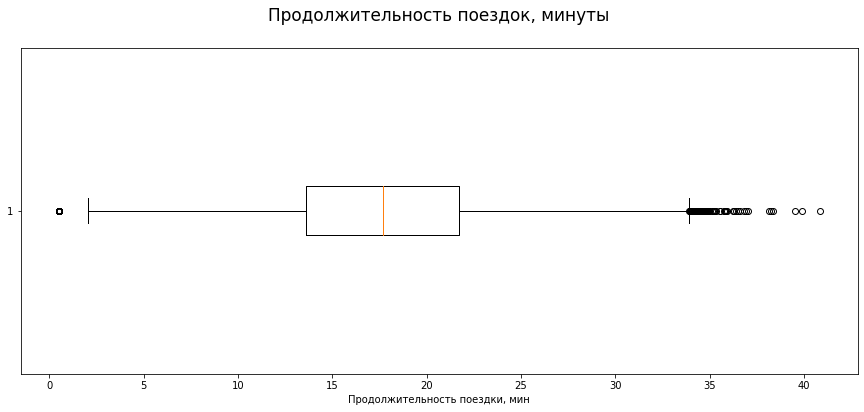

In [18]:
plt.figure(figsize=(15, 6))
plt.boxplot(riders['duration'], vert=False)
plt.xlabel('Продолжительность поездки, мин')
plt.title('Продолжительность поездок, минуты' + "\n", fontsize=17);
plt.show()

Средняя продолжительность поездок составляет около 17 минуты. Основная масса поездок от 13 до 21 минуты. Стандартное отклонение в 6.09 минут, означает, что продолжительность поездок варьируется относительно сильно. 25% поездок имеют продолжительность менее 13.6 минут, что говорит о наличии коротких поездок в выборке. Максимальное время поездки - 40 мин. Распределение продолжительности поездок напоминает нормальное.

**Вывод по разделу "Исследовательский анализ данных"**

Итак, сервис аренды самокатов привлекает разнообразную аудиторию, но наиболее популярен среди молодых пользователей в возрасте от 22 до 28 лет. Пользователи предпочитают совершать короткие поездки на расстояниях до 5 километров, и средняя продолжительность поездок составляет около 17 минут. Сервис  наиболее популярен в городе Пятигорск, в то время как в Москве он имеет наименьшую популярность. Соотношение пользователей с подпиской и без говорит о преобладании последних.

## Ⅳ. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм.

In [19]:
# Размеры датасетов до объединения
size_df = {
    'Dataset': ['users', 'riders', 'subs'],
    'Rows': [users.shape[0], riders.shape[0], subs.shape[0]],
    'Columns': [users.shape[1], riders.shape[1], subs.shape[1]]
}

pd.DataFrame(size_df)

,Dataset,Rows,Columns
0,users,1534,5
1,riders,18068,5
2,subs,2,4


In [20]:
full_data = users.merge(riders, on='user_id', how='left')
full_data = full_data.merge(subs, on = 'subscription_type', how='left')

In [21]:
full_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [22]:
# Размер результирующего датафрейма
size_fd = {
    'Dataset': ['full_data'],
    'Rows': [full_data.shape[0]],
    'Columns': [full_data.shape[1]]
}

pd.DataFrame(size_fd)

,Dataset,Rows,Columns
0,full_data,18068,12


In [23]:
# Проверим данные на пропуски

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


##### Данные о пользователях

In [24]:
##### Данные о пользователях без подписки

df_notsub = full_data.query('subscription_type == "free"')
df_notsub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [25]:
##### Данные о пользователях с подпиской

df_sub = full_data.query('subscription_type == "ultra"')
df_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


##### Визаулизация данных

,distance,duration
count,835.000000,835.000000
mean,42191.963375,240.931783
std,12106.720431,68.753039
min,8838.803579,56.074907
25%,34183.421552,194.291257
50%,41620.449333,235.716318
75%,50120.358053,286.321154
max,79325.846482,446.233013


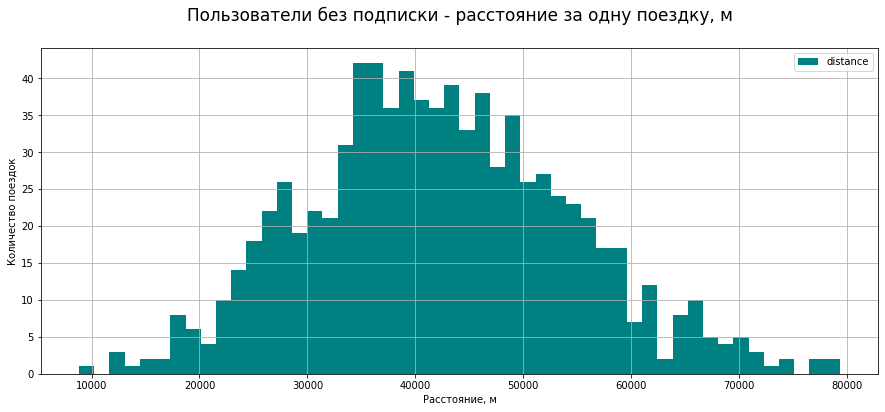

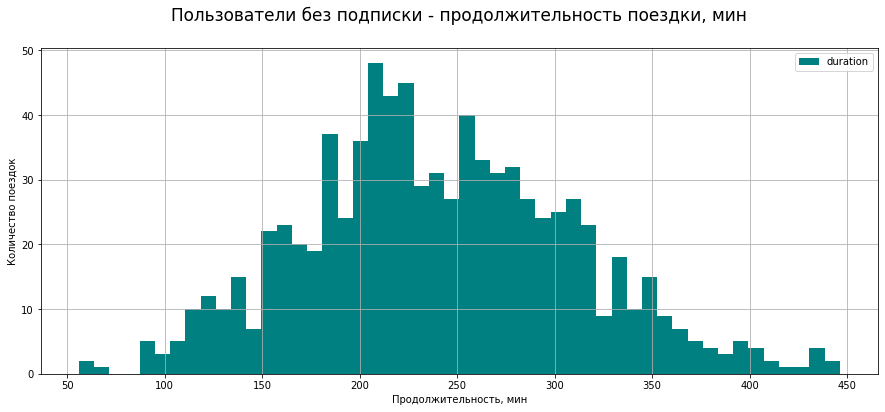

In [26]:
# Статистические данных пользователей без подписки

display(df_notsub.pivot_table(index=['user_id'], values=['distance', 'duration'], aggfunc='sum').describe())

# Гистограмма расстояния, которое проезжает пользователь без подписки за одну сессию

df_notsub.pivot_table(index=['user_id'],values='distance', aggfunc='sum')\
                    .plot.hist(bins=50, grid=True, legend=True, figsize = (15,6), color='Teal')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.title('Пользователи без подписки - расстояние за одну поездку, м' + '\n', fontsize=17)
plt.show();

# Гистограмма продолжительности поездки пользователей без подписки

df_notsub.pivot_table(index=['user_id'], values='duration', aggfunc='sum')\
                    .plot.hist(bins=50, grid=True, legend=True, figsize = (15,6), color='Teal')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.title('Пользователи без подписки - продолжительность поездки, мин' + '\n', fontsize=17)
plt.show();

Для пользователей без подписки:
- Среднее расстояние, которое они проезжают за одну поездку, составляет около 42 км.
- Средняя продолжительность поездки составляет примерно 240,93 минуты.
- Стандартное отклонение для расстояния и продолжительности поездки относительно невелико, что указывает на сравнительно небольшой разброс в данных.
- Минимальное расстояние, которое проехали пользователи без подписки, составляет около 8,8 км.
- Максимальное расстояние достигает около 79,3 км, что является выдающимся результатом.

,distance,duration
count,699.000000,699.000000
mean,28970.522206,172.421894
std,10370.610254,61.061422
min,5530.344048,34.157765
25%,21411.243798,126.094588
50%,28630.341916,169.739505
75%,35708.654860,209.445901
max,65393.983354,411.822515


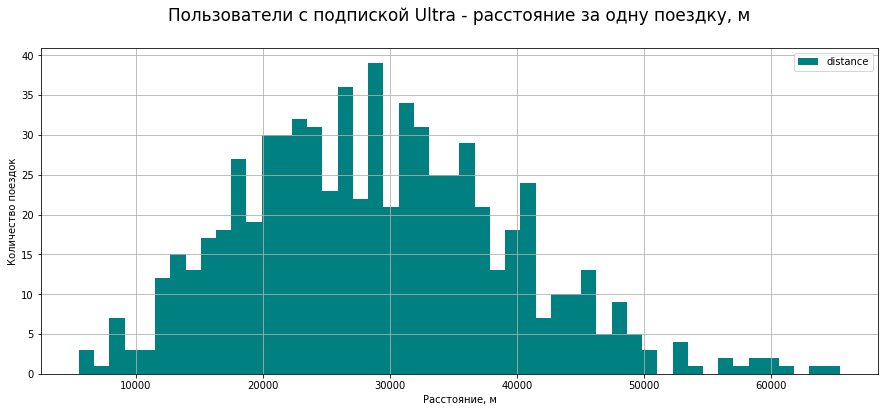

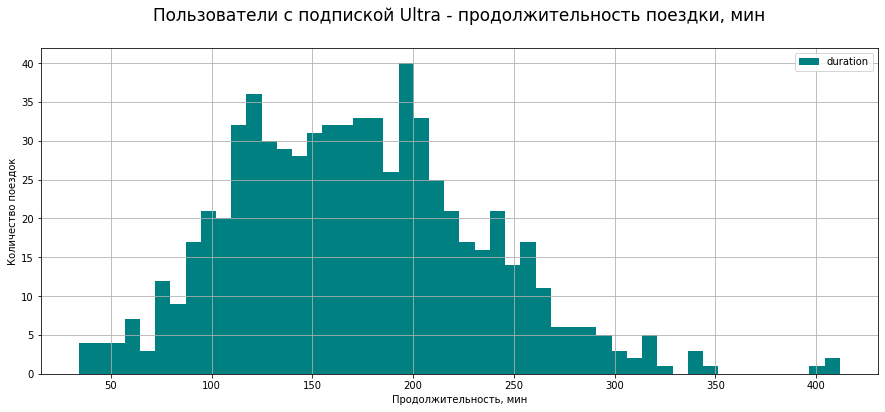

In [27]:
# Статистические данных пользователей с подпиской
display(df_sub.pivot_table(index=['user_id'], values=['distance', 'duration'], aggfunc='sum').describe())

# Гистограмма расстояния, которое проезжает пользователь с подпиской за одну сессию

df_sub.pivot_table(index=['user_id'],values='distance', aggfunc='sum')\
                    .plot.hist(bins=50, grid=True, legend=True, figsize = (15,6), color='Teal')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.title('Пользователи с подпиской Ultra - расстояние за одну поездку, м' + '\n', fontsize=17)
plt.show();

# Гистограмма продолжительности поездки пользователей c подпиской

df_sub.pivot_table(index=['user_id'],values='duration', aggfunc='sum')\
                    .plot.hist(bins=50, grid=True, legend=True, figsize = (15,6), color='Teal')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.title('Пользователи с подпиской Ultra - продолжительность поездки, мин' + '\n', fontsize=17)
plt.show();

Для пользователей с подпиской Ultra:
- Среднее расстояние, которое они проезжают за одну поездку, составляет около 29 км.
- Средняя продолжительность поездки составляет примерно 172 минуты.
- Стандартное отклонение для расстояния и продолжительности поездки также относительно невелико.
- Минимальное расстояние, которое проехали пользователи с подпиской Ultra, составляет около 5,53 км.
- Максимальное расстояние достигает около 65,4 км.

**Вывод по разделу "Объединение данных"**

Мы объединили данные о пользователях, поездках и подписках в один датафрейм. А также, проанализировали информацию отдельно о пользователях с подпиской и без. Пользователи аренды самокатов без подписки в среднем проезжают за сессию более длинные расстояния и имеют более длительные поездки по сравнению с пользователями с подпиской Ultra.

## Ⅴ. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными

In [28]:
# округлим данные в столбцах duration и distance

full_data['duration'] = np.ceil(full_data['duration']).astype('int')
full_data['distance'] = np.ceil(full_data['distance']).astype('int')

In [29]:
# Создадим датафрейм с агрегированными данными

agg_data = full_data.groupby(['user_id', 'name', 'age', 'city', 'subscription_type', 'month', 'minute_price', 'start_ride_price', 'subscription_fee']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'name':'count'}).rename(columns={'name':'month_count'}).reset_index()

In [30]:
agg_data.head()

,user_id,name,age,city,subscription_type,month,minute_price,start_ride_price,subscription_fee,distance,duration,month_count
0,1,Кира,22,Тюмень,ultra,1,6,0,199,7028,42,2
1,1,Кира,22,Тюмень,ultra,4,6,0,199,755,7,1
2,1,Кира,22,Тюмень,ultra,8,6,0,199,6724,46,2
3,1,Кира,22,Тюмень,ultra,10,6,0,199,5811,32,2
4,1,Кира,22,Тюмень,ultra,11,6,0,199,7005,56,3


#####  Добавим столбец с помесячной выручкой

In [31]:
# Расчёт помесячной выручки

agg_data['month_revenue'] = (
    agg_data['start_ride_price'] * agg_data['month_count'] + 
    agg_data['minute_price'] * agg_data['duration'] + 
    agg_data['subscription_fee']
)

In [32]:
agg_data_pivot = agg_data.groupby(['user_id', 'name', 'age', 'city', 'subscription_type', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'month_revenue':'sum'}).reset_index()
agg_data_pivot.head(10)

,user_id,name,age,city,subscription_type,month,distance,duration,month_revenue
0,1,Кира,22,Тюмень,ultra,1,7028,42,451
1,1,Кира,22,Тюмень,ultra,4,755,7,241
2,1,Кира,22,Тюмень,ultra,8,6724,46,475
3,1,Кира,22,Тюмень,ultra,10,5811,32,391
4,1,Кира,22,Тюмень,ultra,11,7005,56,535
5,1,Кира,22,Тюмень,ultra,12,6753,28,367
6,2,Станислав,31,Омск,ultra,3,10190,63,577
7,2,Станислав,31,Омск,ultra,4,6165,40,439
8,2,Станислав,31,Омск,ultra,6,3256,14,283
9,2,Станислав,31,Омск,ultra,7,6781,48,487


**Вывод по разделу "Подсчёт выручки"**

Мы собрали агрегированные данные о поездках и посчитали суммарное расстояние, количество поездок и общее время в пути для каждого пользователя в течение каждого месяца. Дополнительно, мы внесли информацию о месячной выручке, полученной от каждого пользователя, в этот же датафрейм. Для более наглядной интерпретации продолжительности поездок, мы округлили их значения до ближайшего целого числа.

## Ⅵ. Проверка гипотез

### Гипотеза 1.

##### Трятят ли пользователи с подпиской больше времени на поездки.

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

У нас есть количество времени, которое пользователи тратят в сервисе: пользователи с подпиской и без. Проверим гипотезу о том, что пользователи с подпиской оставляют больше денег в приложении.

Нулевая гипотеза: среднее время сессий пользователей из двух групп равны.  
Альтернативная гипотеза: среднее время сессий пользователей с подпиской больше, чем среднее время сессий пользователей без подписки.

In [33]:
sub_duration = full_data.query('subscription_type == "ultra"')['duration']
notsub_duration = full_data.query('subscription_type == "free"')['duration']
print('Количество сессий с подпиской: ', sub_duration.count())
print('Количество сессий без подписки: ', notsub_duration.count())
alpha =0.05
results = st.ttest_ind(sub_duration, notsub_duration, equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Количество сессий с подпиской:  6500
Количество сессий без подписки:  11568
p-значение: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


**Вывод:** пользователи с подпиской тратят за сессию в сервисе больше времени.

### Гипотеза 2.

##### Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает оптимальных 3130 метров.  
Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской составляет более 3130 метров.

In [34]:
sub_distance = full_data.query('subscription_type == "ultra"')['distance']
interested_value = 3130
alpha = 0.05 
results = st.ttest_1samp(sub_distance, interested_value, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9120422337080507
Не получилось отвергнуть нулевую гипотезу


**Вывод**. Можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает оптимальных 3130 метров.

### Гипотеза 3.

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам не превышает выручку от пользователей без подписки.  
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [35]:
sub_month_revenue = agg_data_pivot.query('subscription_type == "ultra"')['month_revenue']
notsub_month_revenue = agg_data_pivot.query('subscription_type == "free"')['month_revenue']
print('Количество месяцев с выручкой пользователей с подпиской: ', sub_month_revenue.count())
print('Количество месяцев с выручкой пользователей без подписки: ', notsub_month_revenue.count())
alpha = 0.05
results = st.ttest_ind(sub_month_revenue, notsub_month_revenue, equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Количество месяцев с выручкой пользователей с подпиской:  4533
Количество месяцев с выручкой пользователей без подписки:  6798
p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Вывод:** помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

### Вопрос  

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ**  

Для проверки этой гипотезы нам понадобился бы тест о равенстве средних для зависимых выборок до и после изменения, т.к. мы имеем дело с парными выборками одного и того же объекта - количество обращений пользователей в техподдержку до обновления и после него.

**Вывод по разделу "Проверка гипотез"**

Проверка гипотез выявила несколько важных моментов:

 - пользователи с подпиской тратят за сессию в сервисе больше времени;
 - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает оптимальных 3130 метров;
 - помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

### Распределения

##### Задача 1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

**Решение**

Для решения задачи воспользуемся кумулятивной функцией распределения, а также аппроксимируем биноминальное распределение нормальным.

Для нормальной аппроксимации биномиального распределения, можно использовать центральную предельную теорему. Согласно этой теореме, если размер выборки достаточно велик, то биномиальное распределение можно аппроксимировать нормальным распределением.

Математическое ожидание (mu) и стандартное отклонение (sigma) биномиального распределения можно вычислить по формулам: 

$$\mu = n ⋅ p$$

$$\sigma = \sqrt(n ⋅ p ⋅ (1 - p))$$

где n - количество испытаний, p - вероятность успеха.

Затем воспользуемся этими значениями для создания нормального распределения и вычисления функции распределения (CDF).

На основе полученного распределения построим график.

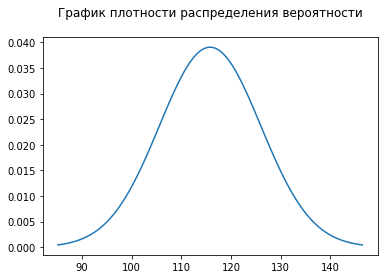

Минимальное количество промокодов: 1158


In [36]:
# исходные данные
p = 0.1
target = 100
alpha = 0.05

n = target

# найдём такое минимальное количество промокодов, для которого существует вероятность не выполнить план менее 5%
while True:
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    distr = st.norm(mu, sigma)
    if distr.cdf(target-1) < alpha:
        break
    n += 1

# построим график плотности распределения вероятности
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.title('График плотности распределения вероятности' + "\n", fontsize=12);
plt.plot(x, distr.pdf(x))
plt.show()

print(f"Минимальное количество промокодов: {n}")

Необходимо разослать 1158 промокодов, чтобы вероятность не выполнить план была 5 %

##### Задача 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

**Решение**  

Как и в предыдущей задаче рассчитаем мат ожидание и стандартное отклонение. Далее воспользуемся методом аппроксимациии биномиального распределения нормальным и вычислим вероятность с помощью функции cdf(). В заключении построим график.

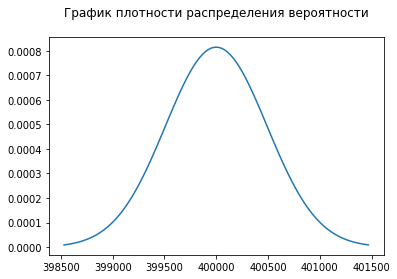

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


In [37]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# значение, для которого хотим найти вероятность
x = 399500

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста справа от 399,5 тысяч
result = distr.cdf(x)

# построим график плотности распределения вероятности
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, distr.pdf(x))
plt.title('График плотности распределения вероятности' + "\n", fontsize=12);
plt.show()

print(f"Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {(result*100).round(2)}%")

## Ⅶ. Общий вывод

Мы провели анализ данных о сервисе аренды самокатов GoFast, который предлагает два варианта использования: без подписки и с подпиской Ultra. Анализ был проведен в несколько этапов согласно представленным разделам.

В разделе “Описание данных” мы загрузили и изучили данные о пользователях, поездках и подписках сервиса аренды самокатов. Мы проверили типы данных, наличие пропусков и дубликатов в каждой таблице.

В разделе “Предобработка данных” мы привели данные к нужным типам, удалили дубликаты в таблице о пользователях и добавили столбец с номером месяца в таблице о поездках.

В разделе “Исследовательский анализ данных” мы изучили распределение пользователей по возрасту, городу, подписке, а также среднюю продолжительность и расстояние поездок. Мы выявили особенности поведения пользователей в разных городах и сравнили популярность сервиса в них.

В разделе “Объединение данных” мы соединили данные о пользователях, поездках и подписках в один датафрейм. Мы также сделали срезы данных по пользователям с подпиской и без, и проанализировали различия в их характеристиках.

В разделе “Подсчёт выручки” мы сгруппировали данные по пользователям и месяцам, и посчитали суммарное расстояние, количество и время поездок для каждого пользователя. Мы также добавили столбец с месячной выручкой от каждого пользователя, учитывая тарифы подписки и стоимость за километр.

В разделе "Проверка гипотез" были выявлены следующие закономерности:

- Гипотеза о том, что пользователи с подпиской тратят за сессию в сервисе больше времени подтвердилась.

- Гипотеза о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает оптимальных 3130 метров подтвердилась.

- Гипотеза, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки подтвердилась.

На основе наших результатов мы можем сделать следующий общий вывод:  

- Сервис имеет разную популярность в разных городах, причём наибольший спрос на него в Пятигорске, а наименьший - в Москве. Это может быть связано с различиями в размере, инфраструктуре, климате и культуре городов, а также с уровнем конкуренции на рынке аренды самокатов.


- Сервис пользуется примерно одинаковым интересом среди пользователей с подпиской и без подписки, хотя пользователей без подписки немного больше. Это может говорить о том, что сервис не достаточно мотивирует пользователей переходить на подписку Ultra, которая имеет более выгодные условия для частого использования сервиса.


- Сервис привлекает в основном молодых людей, средний возраст которых составляет 25 лет. Самому старшему пользователю 43 года. Это может быть обусловлено тем, что самокаты являются более привлекательным и доступным видом транспорта для молодёжи, чем для более взрослой аудитории.


- Среднее расстояние, которое пользователь преодолевает за одну поездку, составляет около 3000 метров, а средняя продолжительность поездки - около 17 минут. Есть явная положительная связь между расстоянием и временем поездки, то есть чем дальше едет пользователь, тем дольше он едет. Это логично, так как скорость самокатов ограничена и зависит от условий движения.


- Пользователи без подписки ездят дольше и дальше, чем пользователи с подпиской Ultra. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет менее 3115 метров. Это может объясняться тем, что пользователи без подписки платят более высокую стоимость за каждую поездку. Это может стимулировать их использовать самокаты более эффективно и на длинные расстояния.


- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Это свидетельствует о том, что подписка Ultra является более прибыльным продуктом для сервиса GoFast, чем оплата за каждую поездку отдельно. Подписка Ultra также способствует повышению лояльности клиентов и уменьшению оттока.

Таким образом, мы можем заключить, что сервис GoFast имеет потенциал для роста и развития на рынке аренды самокатов, но ему необходимо учитывать специфику разных городов и целевых аудиторий, а также стимулировать пользователей переходить на подписку Ultra.